# Example - 45 - ADEPT ViTaL - Venus (Concept)

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This notebook simulates the atmospheric entry of the ADEPT ViTaL entry system concept. https://ieeexplore.ieee.org/document/6497176

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("VENUS")  
planet.h_skip = 200.0E3
planet.h_trap = 20.0E3
planet.loadAtmosphereModel('../atmdata/Venus/venus-gram-avg.dat', 0, 1, 2, 3)

In [4]:
# Set up the vehicle
vehicle1=Vehicle('adept-vital', 1620.0, 38.0, 0.0, np.pi*6.0**2.0*0.25, 0.0, 3.0, planet)

In [5]:
# Set up entry parameters
vehicle1.setInitialState(200.0,0.0,0.0,10.8,0.0,-8.25,0.0,0.0)

In [6]:
# Set up solver
vehicle1.setSolverParams(1E-6)

In [7]:
# Propogate vehicle entry trajectory
vehicle1.propogateEntry (120.0*60.0,0.1,0.0)

In [8]:
# import rcParams to set figure font type
from matplotlib import rcParams

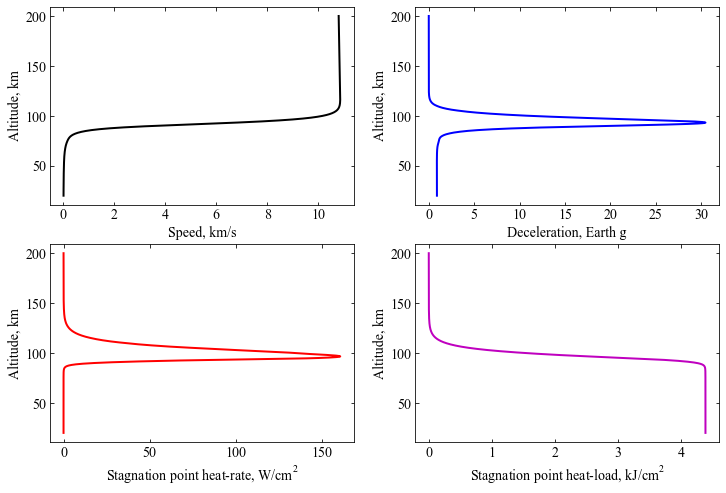

In [9]:
fig = plt.figure(figsize=(12,8))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle1.v_kmsc, vehicle1.h_kmc, 'k-', linewidth=2.0)

plt.xlabel('Speed, km/s',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 2)
plt.plot(vehicle1.acc_net_g, vehicle1.h_kmc, 'b-', linewidth=2.0)
plt.xlabel('Deceleration, Earth g',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.subplot(2, 2, 3)
plt.plot(vehicle1.q_stag_total, vehicle1.h_kmc,'r-', linewidth=2.0)
plt.xlabel('Stagnation point heat-rate, '+r'$W/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)


plt.subplot(2, 2, 4)
plt.plot(vehicle1.heatload/1.0E3, vehicle1.h_kmc, 'm-', linewidth=2.0)
plt.xlabel('Stagnation point heat-load, '+r'$kJ/cm^2$',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/adept-vital-venus.png',bbox_inches='tight')
plt.savefig('../plots/adept-vital-venus.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/adept-vital-venus.eps', dpi=300,bbox_inches='tight')

plt.show()

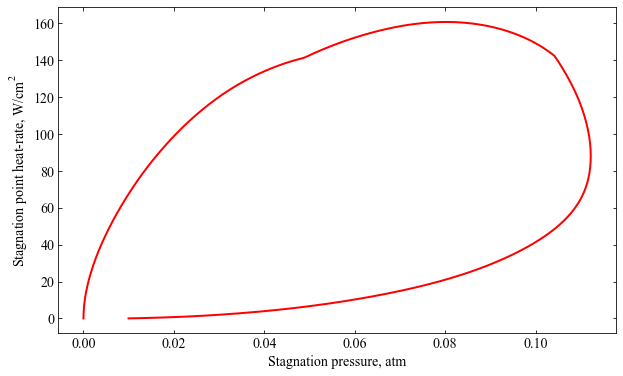

In [20]:
plt.figure(figsize=(10,6))
plt.plot(vehicle1.stag_pres_atm[0:1700], vehicle1.q_stag_total[0:1700], 'r-', linewidth=2.0)
plt.xlabel('Stagnation pressure, atm',fontsize=14)
plt.ylabel('Stagnation point heat-rate, '+r'$W/cm^2$',fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

plt.savefig('../plots/adept-vital-venus-thermal.png',bbox_inches='tight')
plt.savefig('../plots/adept-vital-venus.thermal.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/adept-vital-venus.thermal.eps', dpi=300,bbox_inches='tight')

plt.show()